In [42]:
import pandas as pd


In [43]:
df = pd.read_csv('1101.csv')
df['date'] = pd.to_datetime(df['date'])
df.head(10)

,date,open,high,low,close,adjclose,volume
0,2016-03-11,24.76,24.80,24.51,24.60,18.76,5093534.0
1,2016-03-14,24.96,24.96,24.60,24.84,18.95,7884410.0
2,2016-03-15,24.84,24.84,24.23,24.35,18.58,8482631.0
3,2016-03-16,24.43,24.60,24.23,24.60,18.76,6780667.0
4,2016-03-17,24.84,24.96,24.60,24.96,19.04,8769382.0
5,2016-03-18,25.12,25.57,25.12,25.57,19.50,21254165.0
6,2016-03-21,25.69,25.85,25.16,25.61,19.53,5898166.0
7,2016-03-22,25.69,25.97,25.28,25.97,19.81,6360428.0
8,2016-03-23,25.77,25.89,25.40,25.57,19.50,5997046.0
9,2016-03-24,25.57,25.57,24.96,24.96,19.04,15288018.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1190 non-null   datetime64[ns]
 1   open      1186 non-null   float64       
 2   high      1186 non-null   float64       
 3   low       1186 non-null   float64       
 4   close     1186 non-null   float64       
 5   adjclose  1186 non-null   float64       
 6   volume    1186 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 65.2 KB


In [45]:
sma_short = pd.DataFrame()
sma_short['date'] = df['date']
sma_short['adjclose'] = df['adjclose'].rolling(window=5).mean()
sma_short.loc[15:30]

,date,adjclose
15,2016-04-01,19.206
16,2016-04-06,19.038
17,2016-04-07,18.932
18,2016-04-08,18.804
19,2016-04-11,18.644
20,2016-04-12,18.606
21,2016-04-13,18.804
22,2016-04-14,19.192
23,2016-04-15,19.604
24,2016-04-18,20.066


In [46]:
sma_long = pd.DataFrame()
sma_long['date'] = df['date']
sma_long['adjclose'] = df['adjclose'].rolling(window=22).mean()
sma_long.loc[90:110]

,date,adjclose
90,2016-07-21,20.807273
91,2016-07-22,20.866364
92,2016-07-25,20.974091
93,2016-07-26,21.084091
94,2016-07-27,21.202727
95,2016-07-28,21.313182
96,2016-07-29,21.427727
97,2016-08-01,21.526818
98,2016-08-02,21.623636
99,2016-08-03,21.706818


<AxesSubplot:xlabel='date', ylabel='adjclose'>

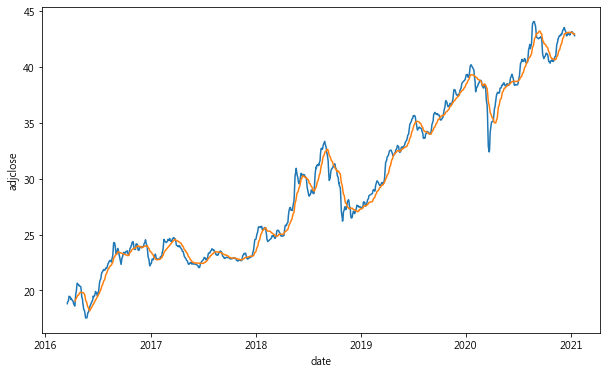

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='adjclose', data=sma_short)
sns.lineplot(x='date', y='adjclose', data=sma_long)


In [48]:
import numpy as np

def buy_sell(df):
    signal_buy = []  # 買點價格
    signal_sell = [] # 賣點價格
    
    flag=-1          # 買賣點旗標，短期超過長期為1，反之為0
    
    # 掃描每一筆資料
    for index, row in df.iterrows():
        # 短期超過長期
        if row[df.columns[1]] > row[df.columns[2]]:
            if flag!=1: # 之前的短期未超過長期，即黃金交叉
                signal_buy.append(row[df.columns[3]])
                signal_sell.append(np.nan)
                flag=1
            else:
                signal_buy.append(np.nan)
                signal_sell.append(np.nan)
        elif row[df.columns[1]] < row[df.columns[2]]:
            if flag!=0: # 之前的長期未超過短期，即死亡交叉
                signal_buy.append(np.nan)
                signal_sell.append(row[df.columns[3]])
                flag=0
            else:
                signal_buy.append(np.nan)
                signal_sell.append(np.nan)
        else:
            signal_buy.append(np.nan)
            signal_sell.append(np.nan)
    return (signal_buy, signal_sell)

In [49]:
signal_buy, signal_sell = buy_sell(df_new)
# 買點
df_buy = pd.DataFrame({'date': df['date'], 'signal_buy':signal_buy})
df_buy = df_buy[~np.isnan(signal_buy)]
df_buy

,date,signal_buy
124,2016-09-07,24.22
368,2017-09-04,23.30
428,2017-11-30,22.69
511,2018-04-11,26.00
590,2018-08-02,31.35
703,2019-01-14,27.49
863,2019-09-17,35.49
1012,2020-05-04,37.92
1155,2020-11-26,42.95


In [50]:
# 賣點
df_sell = pd.DataFrame({'date': df['date'], 'signal_sell':signal_sell})
df_sell = df_sell[~np.isnan(signal_sell)]
df_sell

,date,signal_sell
201,2016-12-27,22.09
381,2017-09-21,22.86
507,2018-04-02,24.79
581,2018-07-20,28.61
634,2018-10-04,30.73
844,2019-08-19,34.24
969,2020-02-27,37.97
1122,2020-10-12,40.95


In [51]:
# 合併短期與長期移動平均線
df_new = sma_short.copy()
df_new = df_new.rename({'adjclose':'sma_short'}, axis=1)
df_new.insert(2, 'sma_long', sma_long['adjclose'])
df_new.insert(3, 'adjclose', df['adjclose'])
df_new.head()

,date,sma_short,sma_long,adjclose
0,2016-03-11,NaN,NaN,18.76
1,2016-03-14,NaN,NaN,18.95
2,2016-03-15,NaN,NaN,18.58
3,2016-03-16,NaN,NaN,18.76
4,2016-03-17,18.818,NaN,19.04


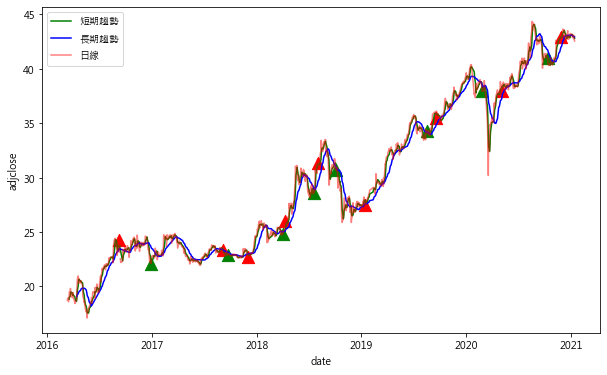

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='adjclose', data=sma_short, color='g', label='短期趨勢')
sns.lineplot(x='date', y='adjclose', data=sma_long, color='b', label='長期趨勢')

plt.plot(df['date'], df['adjclose'], color='r', alpha=0.5, label='日線')
plt.scatter(df['date'], signal_buy, c='r', marker='^', s=150)
plt.scatter(df['date'], signal_sell, c='g', marker='^', s=150)

plt.legend()

In [53]:
# 計算損益(profit/loss)
def calc_profit(df_buy, df_sell, df):
    df_profit = df_buy.merge(df_sell, on='date', how='outer') 
    df_profit.sort_values(by='date', inplace=True)

    df_date = df.set_index('date')

    balance=0
    profit=0
    cost=0
    for index, row in df_profit.iterrows():
        if not row['signal_buy'] is None:
            balance+=1
            cost+=df_date.loc[row['date'], 'adjclose']
        elif not row['signal_sell'] is None:
            if balance>0:
                avg_cost = cost / balance
                profit += df_date.loc[row['date'], 'adjclose'] - avg_cost
                cost -= avg_cost
            else:
                profit += df_date.loc[row['date'], 'adjclose']

            balance-=1

    if balance>0:
        profit += df_date.loc[row['date'], 'adjclose'] * balance - cost
    elif balance<0:
        profit += df_date.loc[row['date'], 'adjclose'] * balance
    
    return profit
    
calc_profit(df_buy, df_sell, df)    

216.5